# Classifying Star Type through Data Analysis

#### Zack Peachell, Jasper Palov, Arjun Saxena, Bhavya Dubey

## Introduction

The dataset we have chosen is from Kaggle, and is called “Star Dataset to Predict Star Types”. It contains a large host of insightful information on different types of stars and their qualities and can be used to make predictive analyses about stars given their features/properties like temperature, absolute magnitude, and radius.

##### Given an unknown observation with a set temperature, radius, and absolute magnitude could the given data accurately predict the Star Type of the unknown point? #####


The purpose of the “Star Dataset” is to prove that the different “Star Types” follow the trends of the Hertzsprung-Russell Diagram, which is used to classify stars based on their measurable features. The dataset is created using several equations in astrophysics and astronomy, including Boltzmann's law of black body radiation to find the luminosity (brightness) of a star; Wien’s displacement law to find the surface temperature of a star using wavelengths; As well the absolute magnitude relation discerns the magnitude of luminosity at a standardised distance of 10 parsecs. In the dataset, the star types are related to numbers such that Brown dwarf  = 0, Red dwarf = 1, White dwarf = 2, Main sequence = 3, Supergiant = 4, and Hypergiant = 5, which will become important when the classification process begins.

We will only be using some of the columns/variables in the raw dataset. All variables, except “Spectral Class”, “Star Color'' and “Luminosity”, are relevant to what our analysis is about, and dropping more might affect the overall validity of our prediction. Of the three non-numerical variables, star color and spectral class have little correlation with the rest of the data in terms of patterns, while “Star Type” does. “Luminosity” is also useless to us in this data analysis as it is directly proportional to “Absolute Magnitude”. To conduct our analysis we will standardize the data so that we can accurately predict star type. We will train our data to yield an accurate value for K using cross-validation and metrics, using that result to test the testing data. This will create an accurate predictor which can easily predict star types. After this, we can say that if we hypothetically had the numerical variable values of an unknown star (including its radius, temperature, etc) then we could make an accurate prediction about its “Star Type” using the classification tools at our disposal. 

We will visualize our results by making three scatter plot graphs that display our three variables against each other. We will fill the points on our scatterplots by “Star Type” and have them colored accordingly so that they stand out against each other in our visualizations. An additional point of the unknown star will also be added to the graph, visualized as a black dot.

## Methods and Results

Before starting the analysis of the data, several packages need to be loaded in to have the functions that are needed to classify/predict in the R language.

In [1]:
#This cell must be run to continue
library(tidyverse)
library(repr)
library(tidymodels)
library(RColorBrewer)
options(repr.matrix.max.rows = 6)
options(repr.plot.width = 6, repr.plot.height = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

The dataset we are using has to be read in from the Git repository through a relative path, so that we can start manipulating it to reach our conclusion, and to avoid any confusion associated with an absolute path.

In [2]:
star_raw_data <- "https://raw.githubusercontent.com/zackpeachell/DSCI_100_008_05_project/main/6%20class%20csv.csv"
read_star <- read_csv(star_raw_data)
read_star

Rows: 240 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Star color, Spectral Class
dbl (5): Temperature (K), Luminosity(L/Lo), Radius(R/Ro), Absolute magnitude...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
3068,0.0024,0.1700,16.12,0,Red,M
3042,0.0005,0.1542,16.60,0,Red,M
2600,0.0003,0.1020,18.70,0,Red,M
⋮,⋮,⋮,⋮,⋮,⋮,⋮
8829,537493,1423,-10.73,5,White,A
9235,404940,1112,-11.23,5,White,A
37882,294903,1783,-7.80,5,Blue,O


Table 1.1

We renamed the columns in the original dataset using the rename function, because although the dataset looks tidy, the names of the columns prove to be quite challenging to work with in R. We changed to remove the brackets and spaces. As well we will remove any "non-applicable" values for star type, as it is the primary concern for the classification. Also since star type is currently a data value with a decimal, we will change it to a factor for classification. 

In [3]:
set.seed(9999)
name_star <- read_star|>
                rename("Star_type" = "Star type")|>
                rename("Temperature_K" = "Temperature (K)")|>
                rename("Star_color" = "Star color")|>
                rename("Spectral_Class" = "Spectral Class")|>
                rename("Luminosity_ratio" = "Luminosity(L/Lo)")|>
                rename("Radius_ratio" = "Radius(R/Ro)")|>
                rename("Absolute_magnitude_Mv" = "Absolute magnitude(Mv)")|>
                filter(Star_type != "NA")|>
                mutate(Star_type = as_factor(Star_type))
name_star

Temperature_K,Luminosity_ratio,Radius_ratio,Absolute_magnitude_Mv,Star_type,Star_color,Spectral_Class
<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<chr>
3068,0.0024,0.1700,16.12,0,Red,M
3042,0.0005,0.1542,16.60,0,Red,M
2600,0.0003,0.1020,18.70,0,Red,M
⋮,⋮,⋮,⋮,⋮,⋮,⋮
8829,537493,1423,-10.73,5,White,A
9235,404940,1112,-11.23,5,White,A
37882,294903,1783,-7.80,5,Blue,O


Table 2.1

We removed certain columns using the select function as the last step of tidying the data. We removed Spectral_Class, Luminosity_ratio, and Star_color columns as they will have little effect on our classifier, and can be removed for clarity purposes.

In [4]:
set.seed(9999)
select_star <- name_star|>
                select(-Spectral_Class, -Luminosity_ratio, -Star_color)
select_star

Temperature_K,Radius_ratio,Absolute_magnitude_Mv,Star_type
<dbl>,<dbl>,<dbl>,<fct>
3068,0.1700,16.12,0
3042,0.1542,16.60,0
2600,0.1020,18.70,0
⋮,⋮,⋮,⋮
8829,1423,-10.73,5
9235,1112,-11.23,5
37882,1783,-7.80,5


Table 3.1

The data in Table 3.1 is very tidy and we could transition to the classification model. Values of maximums, minimums, and means of the individual predictors are very useful to show trends of the predictors for each star type. Summarizing the total amount of each star type could be equally useful to ensure that the variation in each star type is not big.

In [5]:
set.seed(9999)
star_type_count <- select_star|>
                    group_by(Star_type)|>
                    summarize(count = n())

star_type_count
star_type_mean <- select_star |>
                    group_by(Star_type)|>
                    summarize(Temp_mean = mean(Temperature_K, na.rm = TRUE), Radius_ratio_mean = mean(Radius_ratio, na.rm = TRUE), Absolute_mean = mean(Absolute_magnitude_Mv, na.rm = TRUE))
star_type_max <- select_star |>
                    group_by(Star_type)|>
                    summarize(Temp_max = max(Temperature_K, na.rm = TRUE), Radius_ratio_max = max(Radius_ratio, na.rm = TRUE), Absolute_mean = max(Absolute_magnitude_Mv, na.rm = TRUE))
star_type_min <- select_star |>
                    group_by(Star_type)|>
                    summarize(Temp_min = min(Temperature_K, na.rm = TRUE), Radius_ratio_min = min(Radius_ratio, na.rm = TRUE), Absolute_min = min(Absolute_magnitude_Mv, na.rm = TRUE))
star_type_mean
star_type_max
star_type_min

Star_type,count
<fct>,<int>
0,40
1,40
2,40
3,40
4,40
5,40


Star_type,Temp_mean,Radius_ratio_mean,Absolute_mean
<fct>,<dbl>,<dbl>,<dbl>
0,2997.950,1.100150e-01,17.563500
1,3283.825,3.481450e-01,12.539975
2,13931.450,1.072825e-02,12.582500
3,16018.000,4.430300e+00,-0.367425
4,15347.850,5.115000e+01,-6.369925
5,11405.700,1.366898e+03,-9.654250


Star_type,Temp_max,Radius_ratio_max,Absolute_mean
<fct>,<dbl>,<dbl>,<dbl>
0,3531,0.190,20.060
1,3692,0.730,14.940
2,25000,0.015,14.870
3,39000,10.600,6.506
4,40000,98.000,-5.240
5,38940,1948.500,-7.580


Star_type,Temp_min,Radius_ratio_min,Absolute_min
<fct>,<dbl>,<dbl>,<dbl>
0,1939,0.0570,16.05
1,2621,0.0980,10.12
2,7100,0.0084,10.18
3,4077,0.7950,-4.70
4,3008,12.0000,-7.45
5,3399,708.9000,-11.92


In order of appearance; Table 4.1, Table 4.2, Table 4.3, Table 4.4

These tibbles show that there is a certain relationship between mean averages, maximums, and minimums and each variable and the respective Star type. An attempt at visualization to define this relationship is needed and each predictor that we will be using should be plotted against one another, colored with the Star type to show the appropriate relationship. The notebook configures 'options' for plot dimensions, guaranteeing that all visualizations maintain a uniform size and appearance. 

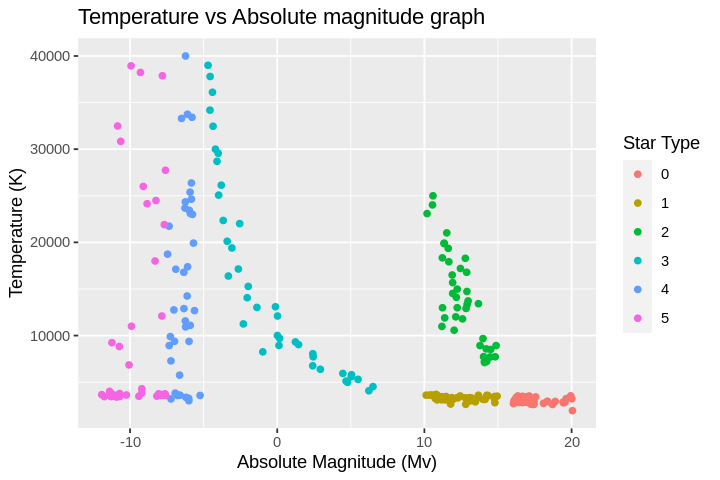

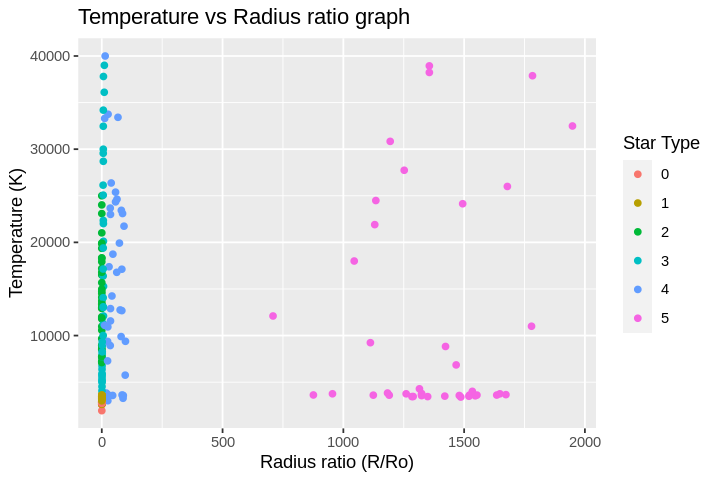

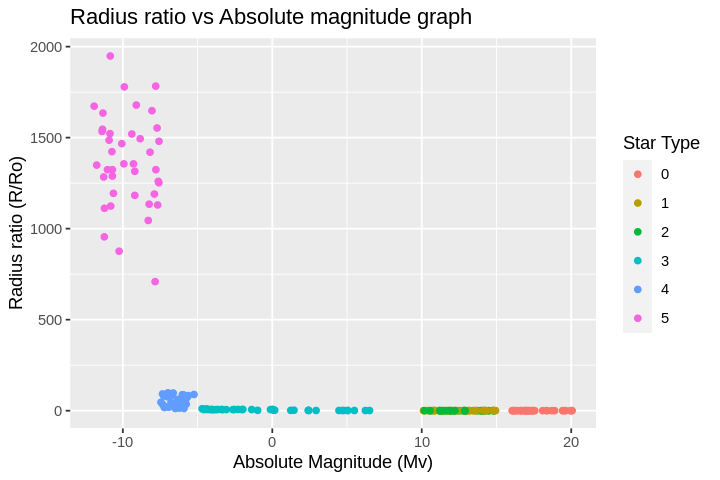

In [6]:
set.seed(9999)
options(repr.plot.width = 6, repr.plot.height = 4)
star_plot_1 <- select_star|>
                    ggplot(aes(x = Absolute_magnitude_Mv, y = Temperature_K))+
                    geom_point(aes(colour = Star_type))+
                    xlab("Absolute Magnitude (Mv)")+
                    ylab("Temperature (K)")+
                    labs(colour = "Star Type")+
                    ggtitle("Temperature vs Absolute magnitude graph")+
                    scale_fill_brewer(palette = "Set2")
star_plot_2 <- select_star|>
                    ggplot(aes(x = Radius_ratio, y = Temperature_K))+
                    geom_point(aes(colour = Star_type))+
                    xlab("Radius ratio (R/Ro)")+
                    ylab("Temperature (K)")+
                    labs(colour = "Star Type")+
                    ggtitle("Temperature vs Radius ratio graph")+
                    scale_fill_brewer(palette = "Set2")
star_plot_3 <- select_star|>
                    ggplot(aes(x = Absolute_magnitude_Mv, y = Radius_ratio))+
                    geom_point(aes(colour = Star_type))+
                    xlab("Absolute Magnitude (Mv)")+
                    ylab("Radius ratio (R/Ro)")+
                    labs(colour = "Star Type")+
                    ggtitle("Radius ratio vs Absolute magnitude graph")+
                    scale_fill_brewer(palette = "Set2")
star_plot_1
star_plot_2
star_plot_3

In order of appearance; Figure 1.1, Figure 1.2, Figure 1.3

The graphs show very clear trends/patterns between the predictors and Star type, these relationships are important for predicting. We can now create the classification model. A split in the data is necessary to create a training and testing dataset to be used to test the accuracy and tune for the best value for the K nearest neighbors. We conducted an initial split of the data into training and testing sets using initial_split. Assigned the split data into train_star (training set) and test_star (testing set).

In [7]:
set.seed(9999)
split_star <- initial_split(select_star, prop = 0.75, strata = Star_type)
train_star <- training(split_star)
test_star <- testing(split_star)
train_star

Temperature_K,Radius_ratio,Absolute_magnitude_Mv,Star_type
<dbl>,<dbl>,<dbl>,<fct>
3068,0.1700,16.12,0
3042,0.1542,16.60,0
2600,0.1020,18.70,0
⋮,⋮,⋮,⋮
30839,1194,-10.63,5
8829,1423,-10.73,5
37882,1783,-7.80,5


Table 5.1

The data necessitates scaling due to the difference in value ranges among variables, potentially skewing the contribution of individual features during distance-based calculations. For instance, the temperature values, reaching highs of 35,000-40,000 K for specific star types, significantly outweigh the absolute magnitude values, which do not exceed 20 units. Failing to scale the data might render it unsuitable for analysis. Employing a scaling technique eliminates this issue by standardizing the features, ensuring each contributes meaningfully to the modeling process. By applying the scaling recipe to the dataset, we assess the transformation's effectiveness in normalizing variable scales.


In [8]:
set.seed(9999)

star_recipe <- recipe(Star_type ~ Temperature_K + Radius_ratio + Absolute_magnitude_Mv, data = train_star)|>
                    step_scale(all_predictors())|>
                    step_center(all_predictors())|>
                    prep()
star_scale <- bake(star_recipe, name_star)

star_scale

Temperature_K,Radius_ratio,Absolute_magnitude_Mv,Star_type
<dbl>,<dbl>,<dbl>,<fct>
-0.7696518,-0.4579647,1.106692,0
-0.7724949,-0.4579954,1.152133,0
-0.8208272,-0.4580968,1.350938,0
⋮,⋮,⋮,⋮
-0.13969116,2.306704,-1.435171,5
-0.09529539,1.702407,-1.482506,5
3.03723077,3.006212,-1.157791,5


Table 6.1

A crucial aspect involves selecting an optimal k value to maximize accuracy when evaluating the test data. This will involve tuning and cross-validating k-values within the range of 2 to 10, assuming a 5-fold cross-validation approach. Despite the narrow k-value range, the expectation is minimal impact on overall model accuracy. By crafting a workflow and analyzing resulting metrics, the objective is to pinpoint the most suitable K-value for the model.


In [9]:
set.seed(9999)

kknn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune())|>
                    set_engine("kknn")|>
                    set_mode("classification")

star_vfold <- vfold_cv(train_star, v = 5, strata = Star_type)

k_vals <- tibble(neighbors = seq(from = 2, to = 10, by = 1))

star_workflow <- workflow()|>
                    add_recipe(star_recipe)|>
                    add_model(kknn_tune)|>
                    tune_grid(resamples = star_vfold, grid = k_vals)|>
                    collect_metrics()
star_workflow

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,multiclass,0.9944444,5,0.005555556,Preprocessor1_Model1
2,roc_auc,hand_till,0.9985185,5,0.001079806,Preprocessor1_Model1
3,accuracy,multiclass,0.9722222,5,0.008784105,Preprocessor1_Model2
⋮,⋮,⋮,⋮,⋮,⋮,⋮
9,roc_auc,hand_till,0.9971296,5,0.001137797,Preprocessor1_Model8
10,accuracy,multiclass,0.9611111,5,0.014163943,Preprocessor1_Model9
10,roc_auc,hand_till,0.9962963,5,0.001085744,Preprocessor1_Model9


Table 7.1

Now that we are done with this workflow, we should extract the neighbors and their relative accuracy, hidden in the "mean" column, to determine which K gives the greatest accuracy for our classification model. We can also visualize this as a graph of neighbors vs accuracy, using a line graph, to determine which K value returns the greatest accuracy from the fold splitting.

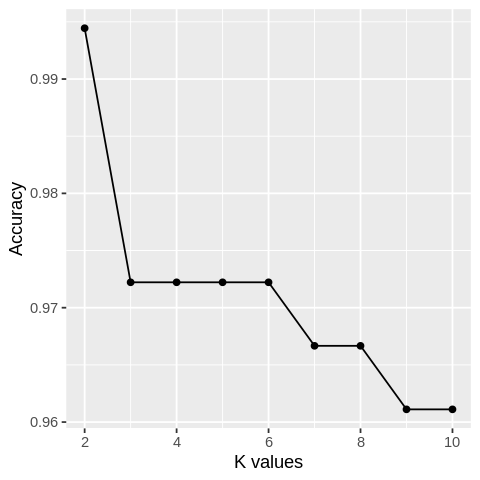

In [10]:
set.seed(9999)

accuracies <- star_workflow |>
                filter(.metric == "accuracy")
options(repr.plot.height = 4, repr.plot.width = 4)
best_k_plot <- accuracies |>
                ggplot(aes(x = neighbors, y = mean))+
                geom_point()+
                geom_line()+
                xlab("K values")+
                ylab("Accuracy")
best_k_plot

Figure 2.1

This graph best shows that accuracy is really high when using k=2 as it is almost one hundred percent accurate. Using this k value, the workflow should be redesigned using the k value so we can test the accuracy against new data, the test data. The same star recipe will be used from before as nothing changes and we need that recipe to test the testing data. 

In [11]:
set.seed(9999)

best_k <- 2

best_kknn <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k)|>
                set_engine("kknn")|>
                set_mode("classification")

best_fit <- workflow()|>
                add_recipe(star_recipe)|>
                add_model(best_kknn)|>
                fit(data = train_star)

best_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(2,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.02222222
Best kernel: rectangular
Best k: 2

Having established an optimized workflow with the ideal k-value, our next step involves predicting and testing against the testing data. We can use the predict and metric functions to achieve this goal. Subsequently, filtering the results will yield a column representing the model's accuracy.

In [12]:
set.seed(9999)
star_predictions <- predict(best_fit, test_star)|>
                        bind_cols(test_star)

star_accuracies <- star_predictions|>
                     metrics(truth = Star_type, estimate = .pred_class)|>
                      filter(.metric == "accuracy")  

star_accuracies

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.9833333


Table 8.1

Table 8.1 proves that our classifier is very accurate, nearly 100 percent. We should move to test a point with its class known to us but is not a part of this dataset to see if it holds up with the classification model. The classifier is predicted to accurately identify the star type for this point. Measurements of white dwarf points. WD 1856+534 possesses a radius ratio of 0.0127811127, a surface temperature of 5800 kelvins, and an absolute magnitude of 15.429 ("Living near a White Dwarf"). The measurements for this particular star are not derived from a star inside our existing dataset, therefore validating the real-world precision of our prediction model.

In [13]:
set.seed(9999)
new_obs_1 <- tibble(Temperature_K = 5800, Radius_ratio = 0.0127811127, Absolute_magnitude_Mv = 15.429, Star_type = NA)

kknn_predict_1 <- predict(best_fit, new_obs_1)
kknn_predict_1

.pred_class
<fct>
2


Table 9.1

The predictive model indicates that our star, falling under star type 2 as per Table 9.1, aligns with the dataset's classification for a white dwarf. This successful alignment substantiates the classifier's capability to make accurate predictions beyond the dataset's confines. With a documented accuracy of 98%, there's a reasonable expectation that the dataset possesses the capacity to classify points extrapolated from its boundaries. It is imperative to visually depict our new data point within the existing dataset, emphasizing the classification model's efficacy. Notably, star type 2 corresponds to the classification of a white dwarf star, affirming the model's accuracy in predicting external data points.

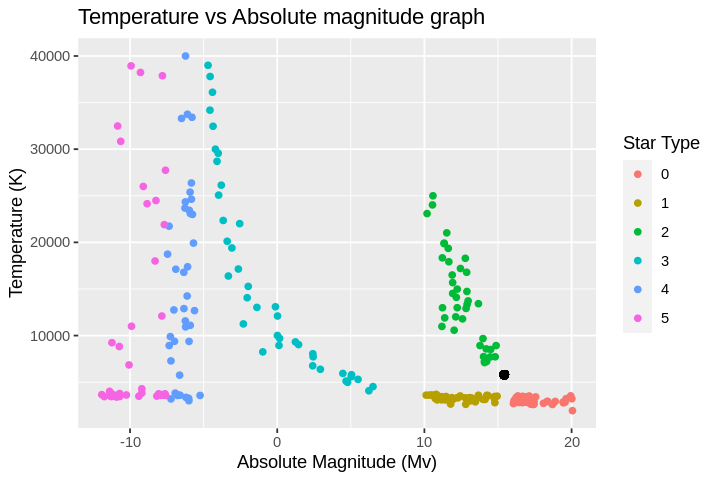

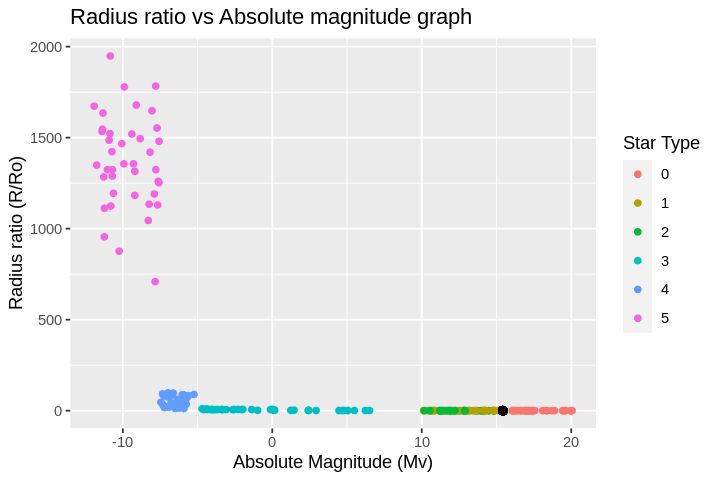

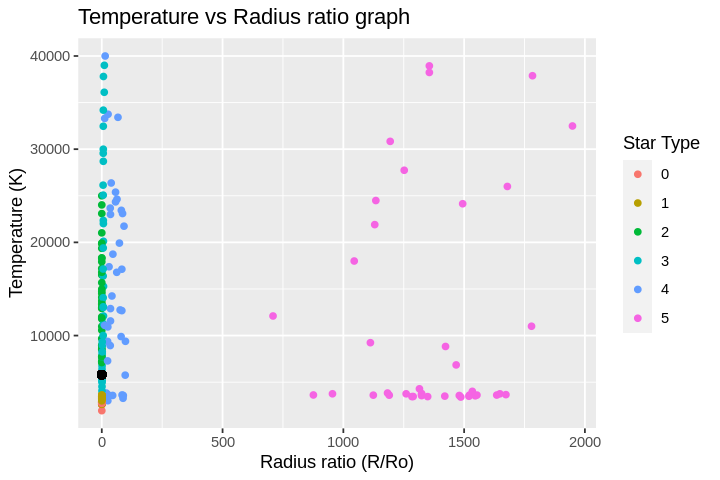

In [14]:
set.seed(9999)
options(repr.plot.width = 6, repr.plot.height = 4)
star_plot_obs_1 <- name_star|>
                    ggplot(aes(x = Absolute_magnitude_Mv, y = Temperature_K))+
                    geom_point(aes(colour = Star_type))+
                    xlab("Absolute Magnitude (Mv)")+
                    ylab("Temperature (K)")+
                    labs(colour = "Star Type")+
                    ggtitle("Temperature vs Absolute magnitude graph")+
                    scale_fill_brewer(palette = "Set2")

star_plot_obs_2 <- name_star|>
                    ggplot(aes(x = Absolute_magnitude_Mv, y = Radius_ratio))+
                    geom_point(aes(colour = Star_type))+
                    xlab("Absolute Magnitude (Mv)")+
                    ylab("Radius ratio (R/Ro)")+
                    labs(colour = "Star Type")+
                    ggtitle("Radius ratio vs Absolute magnitude graph")+
                    scale_fill_brewer(palette = "Set2")

star_plot_obs_3 <- name_star|>
                    ggplot(aes(x = Radius_ratio, y = Temperature_K))+
                    geom_point(aes(colour = Star_type))+
                    xlab("Radius ratio (R/Ro)")+
                    ylab("Temperature (K)")+
                    labs(colour = "Star Type")+
                    ggtitle("Temperature vs Radius ratio graph")+
                    scale_fill_brewer(palette = "Set2")

star_plot_obs_1 <- star_plot_obs_1+
                            geom_point(aes(x = 15.429, y = 5800), colour = "black", size = 2)
star_plot_obs_2 <- star_plot_obs_2+
                            geom_point(aes(x = 15.429, y = 0.0127811127), colour = "black", size = 2)
star_plot_obs_3 <- star_plot_obs_3+
                            geom_point(aes(x = 0.0127811127, y = 5800), colour = "black", size = 2)

star_plot_obs_1
star_plot_obs_2
star_plot_obs_3

In order of appearance; Figure 3.1, Figure 3.2, Figure 3.3

Figure 3.2 and Figure 3.3 show very little in terms of their graphs, as all the points are grouped making it hard to distinguish, however, some of the class 2 points are part of that grouping. Remember this data isn't scaled yet so that could be a contributing factor to their unique shapes. Figure 3.1 however shows the new point as being close to the other class 2 points, affirming that the visualization shows that the classifier is correct!

## Discussion of Results

Through the utilization of a K nearest neighbors classification model, we were able to accomplish precise classification of unknown observations by leveraging the characteristics present in our dataset. Upon conducting tests, our predictor demonstrated a 98% accuracy in predicting outcomes based on the testing data and a 99% accuracy in predicting outcomes based on the training data. The white dwarf star WD 1856+534 was accurately identified as such in our observation, affirming the utility of our model. Our prediction model successfully anticipated the star type based solely on the measurements of our observation, aligning with our initial expectations. 

Such a prediction model could be useful for astronomers and astrophysicists studying unknown stars in deep space and hoping to classify them. This specific classifying model could help these scientists ask further questions about star color and star type, or even ask questions about where a star is in its lifetime, to dive deeper into the mysteries of deep space. An example of the possible practical use of our classification model is to determine approximately how old a star is, and how close it is to reaching its next stage. According to AstroBackyard, star-forming nebulae either create “main-sequence” stars which will grow into yellow dwarfs like our sun, or they will form supergiant stars which are capable of turning into black holes. By using our classification model to accurately label unknown stars featuring a handful of measurements, scientists could predict which stars will form black holes and which are “main sequence”, which will simply form white dwarfs as their lifetime progresses. 

## References

Deepraj Baidya. 2019. Star dataset to predict star types. Retrieved October 24th 2023 from https://www.kaggle.com/datasets/deepu1109/star-dataset/data.
\
\
“Types of Stars: Stellar Classification, Lifecycle, and Charts.” AstroBackyard, 7 Nov. 2023, https://astrobackyard.com/types-of-stars/. 
\
\
Loeb, Avi. “Living near a White Dwarf.” Scientific American, 13 Nov. 2020, www.scientificamerican.com/article/living-near-a-white-dwarf/.